In [1]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from math import log
import anndata as ad
import pandas as pd

In [2]:
input_file = "/Users/manuel/Desktop/dge_300000.h5ad"
sp_dge = sc.read(input_file)

In [4]:
sc.pp.calculate_qc_metrics(sp_dge, inplace=True)

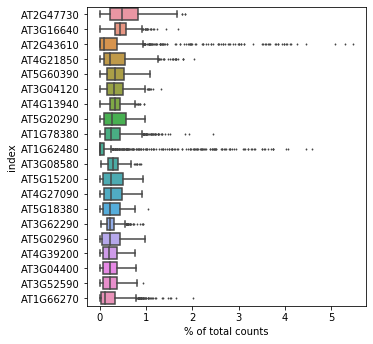

In [22]:
sc.pl.highest_expr_genes(sp_dge, n_top=20, )

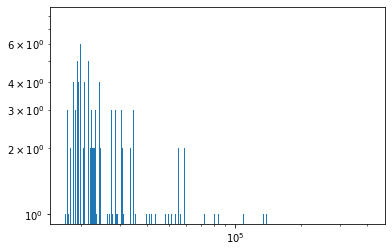

In [17]:
plt.hist(sp_dge.obs['total_counts'], 5000, histtype='bar', rwidth=0.5, align='left')
plt.yscale('log')
plt.xscale('log')

204


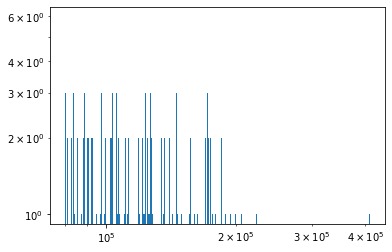

In [19]:
lower_lim = sp_dge.obs['total_counts'] > 80000
upper_lim = sp_dge.obs['total_counts'] < 1000000
sp_dge.obs['keep'] = lower_lim & upper_lim
print(sum(sp_dge.obs["keep"]))

sub = sp_dge[sp_dge.obs['keep'] == True,]
plt.hist(sub.obs['total_counts'], 500, histtype='bar', rwidth=0.5, align='left')
plt.yscale('log')
plt.xscale('log')

## PCA

In [5]:
sub = sp_dge
sc.pp.normalize_total(sub, target_sum=1e4)
sc.pp.log1p(sub)
sc.pp.highly_variable_genes(sub, min_mean=0.0125, max_mean=3, min_disp=0.5)
sub_hvg = sub[:, sub.var.highly_variable]
sub_hvg

View of AnnData object with n_obs × n_vars = 300000 × 11566 
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

In [ ]:
sc.pp.scale(sub_hvg, max_value=10)
sc.tl.pca(sub_hvg, svd_solver='arpack', n_comps=100)
sc.pl.pca(sub_hvg)

/Users/manuel/anaconda3/envs/scanpy_env/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:869: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


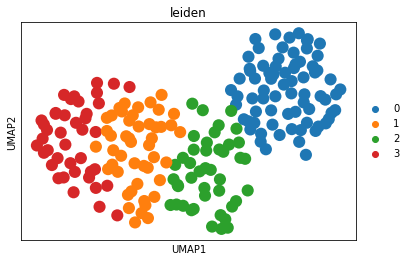

In [28]:
sc.pp.neighbors(sub_hvg, n_neighbors=30, n_pcs=50)
sc.tl.umap(sub_hvg)
sc.tl.leiden(sub_hvg)
sc.pl.umap(sub_hvg, color='leiden')

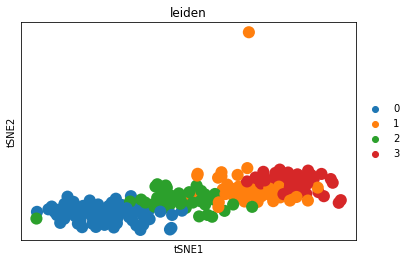

In [30]:
sc.tl.tsne(sub_hvg)
sc.pl.tsne(sub_hvg, color='leiden')